In [84]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '5f06ded7-7b7f-4411-8759-8a27b42e36f5',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


{'status': {'timestamp': '2024-06-06T12:50:26.272Z', 'error_code': 0, 'error_message': None, 'elapsed': 33, 'credit_count': 1, 'notice': None, 'total_count': 10053}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11104, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [85]:
type(data)

dict

In [86]:
import pandas as pd

pd.set_option('display.max_columns',None)

In [87]:
df=pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11104,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19708090.00000,19708090.00000,False,NaN,1,NaN,NaN,None,2024-06-06T12:48:00.000Z,71125.62331,26575355989.69354,-30.00700,0.06768,0.20476,4.29267,11.74073,2.58171,5.21589,1401750185473.04614,53.11040,1493638089481.72998,None,2024-06-06T12:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 15:50:33.157211
1,1027,Ethereum,ETH,ethereum,9041,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120149064.13354,120149064.13354,True,NaN,2,NaN,NaN,None,2024-06-06T12:48:00.000Z,3844.96641,13798523173.62463,-7.63740,-0.17364,0.66852,2.21413,24.92052,13.16819,-2.68835,461969115761.72266,17.50380,461969115761.71997,None,2024-06-06T12:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 15:50:33.157211
2,825,Tether USDt,USDT,tether,87887,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112392062235.46796,115086088103.48178,True,NaN,3,NaN,NaN,None,2024-06-06T12:48:00.000Z,0.99961,59176966945.68372,-18.66120,-0.02729,-0.01931,0.03480,-0.04298,-0.06011,-0.15571,112348363133.78239,4.25680,115041341538.94000,None,2024-06-06T12:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-06 15:50:33.157211
3,1839,BNB,BNB,bnb,2179,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147353678.39241,147353678.39241,False,NaN,4,NaN,NaN,None,2024-06-06T12:48:00.000Z,705.34650,2763108678.93575,-32.00150,-0.13776,0.37973,18.54927,19.12559,20.09427,47.01605,103935400957.48508,3.93810,103935400957.49001,None,2024-06-06T12:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 15:50:33.157211
4,5426,Solana,SOL,solana,675,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,459916974.76248,577564355.47365,True,NaN,5,NaN,NaN,None,2024-06-06T12:48:00.000Z,172.98741,1888502124.78349,-28.38300,-0.00242,0.03672,3.33605,11.63729,-4.44050,16.07838,79559847857.46490,3.01450,99911363943.70000,None,2024-06-06T12:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 15:50:33.157211
5,3408,USDC,USDC,usd-coin,19607,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32649723853.29049,32649723853.29049,False,NaN,6,NaN,NaN,None,2024-06-06T12:48:00.000Z,0.99996,5798546293.87652,-13.51280,-0.02476,-0.00837,-0.01410,0.00039,0.01184,-0.01101,32648272818.24290,1.23700,32648272818.24000,None,2024-06-06T12:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-06 15:50:33.157211
6,52,XRP,XRP,xrp,1339,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55450358947.00000,99987572899.00000,False,NaN,7,NaN,NaN,None,2024-06-06T12:49:00.000Z,0.52550,1101398134.88622,-14.30240,-0.18914,-0.53999,0.84175,-1.99559,-11.88552,-16.29684,29139126067.75991,1.10410,52549932265.74000,None,2024-06-06T12:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 15:50:33.157211
7,74,Dogecoin,DOGE,dogecoin,983,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144596276383.70520,144596276383.70520,True,NaN,8,NaN,NaN,None,2024-06-06T12:49:00.000Z,0.16324,741458844.44343,-13.72030,0.09405,0.54030,1.49102,3.87340,-17.22899,-2.18900,23603744026.58254,0.89430,23603744026.58000,None,2024-06-06T12:49:00.000Z,N

In [27]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
     }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '5f06ded7-7b7f-4411-8759-8a27b42e36f5',
     }

    session = Session()
    session.headers.update(headers)

    try:
     response = session.get(url, params=parameters)
     data = json.loads(response.text)
     #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
     print(e)

    df2=pd.json_normalize(data['data'])
    df2['timestamp']=pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\WSEDR\OneDrive\Documents\Python Scripts\API.csv'):
        df.to_csv(r'C:\Users\WSEDR\OneDrive\Documents\Python Scripts\API.csv',header='column_names')
    else:
        df.to_csv(r'C:\Users\WSEDR\OneDrive\Documents\Python Scripts\API.csv',mode='a',header=False)
    

In [88]:
import os
from time import time
from time import sleep
for i in range (333):
    api_runner()
    print('API Runner Completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner Completed


KeyboardInterrupt: 

In [ ]:
df21=pd.read_csv(r'C:\Users\WSEDR\OneDrive\Documents\Python Scripts\API.csv')
df21

In [ ]:
df

In [36]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [39]:
df 

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11104,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19708090.00000,19708090.00000,False,NaN,1,NaN,NaN,None,2024-06-06T11:44:00.000Z,71084.46264,26616194748.92766,-29.25650,0.25541,0.17076,4.67437,11.83081,2.45688,5.27065,1400938987252.80347,53.07710,1492773715378.25000,None,2024-06-06T11:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 14:45:16.406846
1,1027,Ethereum,ETH,ethereum,9040,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120149064.13354,120149064.13354,True,NaN,2,NaN,NaN,None,2024-06-06T11:43:00.000Z,3851.80197,13775098582.30550,-6.01330,0.10032,1.28586,2.91952,25.19236,13.58207,-2.39252,462790401850.05231,17.53360,462790401850.04999,None,2024-06-06T11:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 14:45:16.406846
2,825,Tether USDt,USDT,tether,87882,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112392062235.46796,115086088103.48178,True,NaN,3,NaN,NaN,None,2024-06-06T11:43:00.000Z,0.99958,58872110080.86122,-18.20340,-0.03713,-0.00555,0.04536,-0.05641,-0.06024,-0.08350,112344316532.15973,4.25660,115037197940.71001,None,2024-06-06T11:43:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-06 14:45:16.406846
3,1839,BNB,BNB,bnb,2179,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147353678.39241,147353678.39241,False,NaN,4,NaN,NaN,None,2024-06-06T11:43:00.000Z,706.98196,2753593601.05742,-32.33340,-0.12950,1.10614,19.00827,18.96551,20.40127,49.85284,104176392274.30452,3.94710,104176392274.30000,None,2024-06-06T11:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 14:45:16.406846
4,5426,Solana,SOL,solana,674,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,459916974.76248,577564355.47365,True,NaN,5,NaN,NaN,None,2024-06-06T11:43:00.000Z,172.96463,1903301629.01131,-26.67200,0.25995,0.26393,3.84821,10.88140,-4.31603,17.03518,79549369245.56297,3.01390,99898204888.78000,None,2024-06-06T11:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 14:45:16.406846
5,3408,USDC,USDC,usd-coin,19605,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32649723853.29049,32649723853.29049,False,NaN,6,NaN,NaN,None,2024-06-06T11:43:00.000Z,0.99991,5765183419.80224,-13.14300,-0.01227,0.00761,-0.00564,-0.01216,0.00787,0.05262,32646860900.27638,1.23700,32646860900.28000,None,2024-06-06T11:43:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-06 14:45:16.406846
6,52,XRP,XRP,xrp,1339,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55450358947.00000,99987572899.00000,False,NaN,7,NaN,NaN,None,2024-06-06T11:44:00.000Z,0.52667,1103119327.82083,-13.65730,0.51958,-0.45094,1.16998,-2.01063,-11.79281,-15.70296,29203972592.69621,1.10650,52666877450.89000,None,2024-06-06T11:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 14:45:16.406846
7,74,Dogecoin,DOGE,dogecoin,982,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144596276383.70520,144596276383.70520,True,NaN,8,NaN,NaN,None,2024-06-06T11:44:00.000Z,0.16325,682504334.13672,-19.96520,0.77907,0.33199,2.33638,3.63387,-17.49881,-3.29008,23605378292.91769,0.89440,23605378292.92000,None,2024-06-06T11:44:00.000Z,NaN,N

In [ ]:
df3=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

In [45]:
df4=df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h      0.25541
         quote.USD.percent_change_24h     0.17076
         quote.USD.percent_change_7d      4.67437
         quote.USD.percent_change_30d    11.83081
         quote.USD.percent_change_60d     2.45688
                                           ...   
TRON     quote.USD.percent_change_24h     0.81038
         quote.USD.percent_change_7d      3.03100
         quote.USD.percent_change_30d    -4.39424
         quote.USD.percent_change_60d    -4.60857
         quote.USD.percent_change_90d   -16.57711
Length: 90, dtype: float64

In [ ]:
type(df3)

In [47]:
type(df4)

pandas.core.series.Series

In [48]:
df5=df4.to_frame(name='value')
df5

value
name                                          
Bitcoin quote.USD.percent_change_1h    0.25541
        quote.USD.percent_change_24h   0.17076
        quote.USD.percent_change_7d    4.67437
        quote.USD.percent_change_30d  11.83081
        quote.USD.percent_change_60d   2.45688
...                                        ...
TRON    quote.USD.percent_change_24h   0.81038
        quote.USD.percent_change_7d    3.03100
        quote.USD.percent_change_30d  -4.39424
        quote.USD.percent_change_60d  -4.60857
        quote.USD.percent_change_90d -16.57711

[90 rows x 1 columns]

In [49]:
type(df5)

pandas.core.frame.DataFrame

In [50]:
df5.count()

value    90
dtype: int64

In [55]:
index=pd.Index(range(90))

df6=df5.reset_index()
df6

,name,level_1,value
0,Bitcoin,quote.USD.percent_change_1h,0.25541
1,Bitcoin,quote.USD.percent_change_24h,0.17076
2,Bitcoin,quote.USD.percent_change_7d,4.67437
3,Bitcoin,quote.USD.percent_change_30d,11.83081
4,Bitcoin,quote.USD.percent_change_60d,2.45688
...,...,...,...
85,TRON,quote.USD.percent_change_24h,0.81038
86,TRON,quote.USD.percent_change_7d,3.03100
87,TRON,quote.USD.percent_change_30d,-4.39424
88,TRON,quote.USD.percent_change_60d,-4.60857


In [57]:
df7=df6.rename(columns={'level_1': 'percentage_change'})
df7

,name,percentage_change,value
0,Bitcoin,quote.USD.percent_change_1h,0.25541
1,Bitcoin,quote.USD.percent_change_24h,0.17076
2,Bitcoin,quote.USD.percent_change_7d,4.67437
3,Bitcoin,quote.USD.percent_change_30d,11.83081
4,Bitcoin,quote.USD.percent_change_60d,2.45688
...,...,...,...
85,TRON,quote.USD.percent_change_24h,0.81038
86,TRON,quote.USD.percent_change_7d,3.03100
87,TRON,quote.USD.percent_change_30d,-4.39424
88,TRON,quote.USD.percent_change_60d,-4.60857


In [68]:
df7['percentage_change']=df7['percentage_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percentage_change,value
0,Bitcoin,1h,0.25541
1,Bitcoin,24h,0.17076
2,Bitcoin,7d,4.67437
3,Bitcoin,30d,11.83081
4,Bitcoin,60d,2.45688
...,...,...,...
85,TRON,24h,0.81038
86,TRON,7d,3.03100
87,TRON,30d,-4.39424
88,TRON,60d,-4.60857


In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\WSEDR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


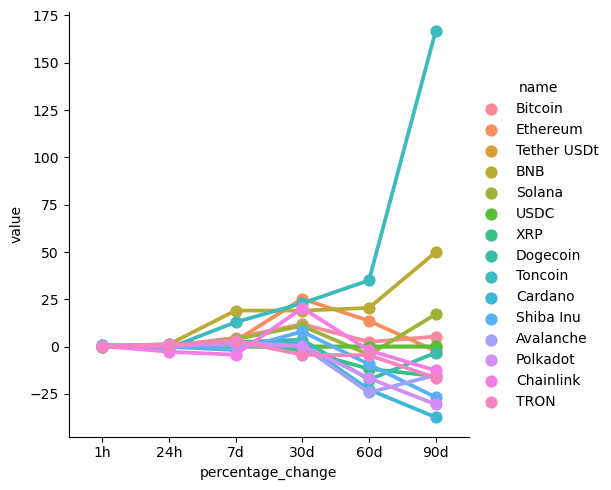

In [72]:
sns.catplot(x='percentage_change',y='value',hue='name',data=df7,kind='point')

In [78]:
df10=df[['name','quote.USD.price','timestamp']]
df11=df10.query("name=='Bitcoin'")
df11

,name,quote.USD.price,timestamp
0,Bitcoin,71084.46264,2024-06-06 14:45:16.406846


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

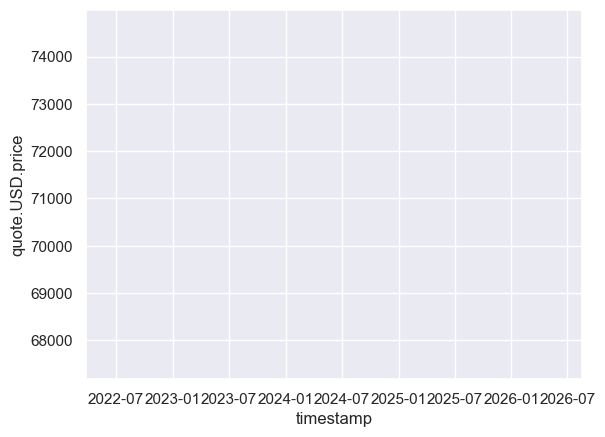

In [81]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp',y='quote.USD.price',data=df11)